# Hands On Astropy Tutorial 
Original notebook shown at the [3rd Asterics-Obelics school](https://github.com/Asterics2020-Obelics/School2019/) by: **Axel Donath and Christoph Deil**. 
This is a shorter version focused on the points needed for CTA analysis. Notebook modified for this workshop by **Ruben Lopez-Coto**

This hands-on tutorial gives an introduction and overview of the [Astropy](http://www.astropy.org/) Python package for Astronomy.

## Preface
We recommend to follow this tutorial by **executing the code cells on your local machine**, along with the tutor. Every sub-topic we will cover in this tutorial will be concluded by a few exercises with different levels of difficulty (easy, advanced and hard). 

## What is Astropy?

![](astropy_banner_96.png)

    "The Astropy Project is a community effort to develop a single core package for Astronomy in Python and foster interoperability between Python astronomy packages."


The concept and structure of the package is decribed in more detail in the first [Astropy paper 2013](http://adsabs.harvard.edu/abs/2013A%26A...558A..33A). The development infrastructure
and status of the v2.0 core package is described in the second [Astropy paper 2018](http://adsabs.harvard.edu/abs/2018AJ....156..123A).

The **Astropy package is structured into several submodules** and we will cover (what we consider) the most important of them in the following order:

1. [astropy.units](http://docs.astropy.org/en/stable/units/index.html) and in particular [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html) to do astronomical calculations with units.

2. [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) and in particular the classes [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) and [Angle](http://docs.astropy.org/en/stable/coordinates/angles.html) to handle astronomical sky positions, coordinate systems and coordinate transformations.

3. [astropy.tables](http://docs.astropy.org/en/stable/table/index.html) and the [Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html) class to handle astronomical data tables.

4. [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html) to open and write data files in [FITS format](https://fits.gsfc.nasa.gov/fits_documentation.html).

5. (optional) Plotting of astronomical sky images with [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/)

In addition to the Astropy core package there is an infrastructure of  [Astropy affiliated packages](http://www.astropy.org/affiliated/) dedicated to specific fields of Astronomy or analysis tasks, such as:

- [Astroplan](https://astroplan.readthedocs.io/en/latest/): observation planning
- [Reproject](http://reproject.readthedocs.io/en/stable/): reprojection of sky images
- [Regions](http://astropy-regions.readthedocs.io/en/latest/): handling of sky regions 
- [Photutils](https://photutils.readthedocs.io/en/stable/): source detection and photometry
- [Gammapy](docs.gammapy.org): gamma-ray Astronomy data analysis
- ...and many others, or maybe your package?


## Other Ressources

There are other ressources with Astropy tutorials, we can recommend:

- [Learn.Astropy](http://learn.astropy.org) webpage with a lot of tutorial material.
- [Astropy documentation](http://docs.astropy.org) webpage, with lots of small usage examples.
- [Astropy Tutorials](https://github.com/astropy/astropy-tutorials) repository (same as linked on Learn.Astropy)
- [Astropy workshop](https://github.com/astropy/astropy-workshop) held the AAS meeting 2019. 
- [STAK project](https://stak-notebooks.readthedocs.io/en/latest/) provided by STSci, with tutorial notebooks for typical IRAF analysis tasks. 
- [Webinar on Youtube](https://www.youtube.com/watch?v=YP42k3J08_o&list=PL7kL5D8ITGyV7zeT-oADweFKHsZNh3tKV) provided by Astronomy Data and Computing Services (ADACS). 

As the content that can be covered in this ~3 hour tutorial is very limited, we recommend to also **check-out the ressources** listed above after the school.

See https://www.astropy.org/help.html for list of references how to **get help on Astropy**.

If you would like to contribute to Astropy, please start by reading the [contribute page](http://www.astropy.org/contribute.html)
on the website.

Let's start with the setup and check of the notebook:

## 0. Setup

Check package versions. All examples should work with Astropy > 2.0 and Numpy > 1.11

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import astropy
print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.20.1
astropy: 4.2


In [75]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import astropy.coordinates as coord
from astropy.table import Table

## 1. Units and Quantities

The [astropy.units]() subpackage provides functions and classes to handle physical quantities with units. 

### 1.1. Basics
The recommended way to import the `astropy.units` submodule is: 

In [3]:
from astropy import units as u

`Quantities` are created by multiplying any number with a unit object:

In [4]:
distance = 1. * u.lightyear
print(distance)

1.0 lyr


Or by passing a string to the general `Quantity` object:

In [5]:
distance = u.Quantity('1 lyr')

Check the availabe units with tab completion on the units module, `u.<TAB>`.

Quantities can be also created using lists and arrays:

In [8]:
distances = [1, 3, 10] * u.lightyear
print(distances)

distances = np.array([1, 3, 10]) * u.lightyear
print(distances)

[ 1.  3. 10.] lyr
[ 1.  3. 10.] lyr


In [9]:
distances.value

array([ 1.,  3., 10.])

The quantity object has a value attribute, which is a plain `numpy.ndarray`:

In [10]:
type(distances.value)

numpy.ndarray

And a unit, which is represented by a `astropy.units.core.Unit` object:

In [11]:
distances.unit

Unit("lyr")

In [12]:
type(distances.unit)

astropy.units.core.Unit

A quantity behaves in many ways just like a `numpy.ndarray` with an attached unit.

In [13]:
distances * 10

<Quantity [ 10.,  30., 100.] lyr>

Many numpy functions will work as expected and return again a `Quantity` object:

In [14]:
np.max(distances)

<Quantity 10. lyr>

In [15]:
np.mean(distances)

<Quantity 4.66666667 lyr>

But there are exceptions, where the unit handling is not well defined, e.g. in `np.log` arguments have to be dimensionless, such as:

In [16]:
#np.log(30 * u.MeV) # Will raise an UnitConversionError
np.log(30 * u.MeV / (10 * u.MeV))

<Quantity 1.09861229>

Probably the most useful method on the `Quantity` object is the `.to()` method which allows to convert a quantity to different units:

In [17]:
distance.to('meter')

<Quantity 9.46073047e+15 m>

In [18]:
distance.to(u.parsec)

<Quantity 0.30660139 pc>

Quantities can be combined with any arithmetical expression to derive other quantities, `astropy.units` will propagate
the units correctly:

In [19]:
speed_of_light = distance / u.year
print(speed_of_light.to('km/s'))

299792.458 km / s


In [20]:
print(speed_of_light.to('angstrom/day'))

2.5902068371199996e+23 Angstrom / d


For standardized unit systems such as `'si'` or `'cgs'` there are convenience attributes on the quantity object:

In [21]:
speed_of_light.si

<Quantity 2.99792458e+08 m / s>

In [22]:
speed_of_light.cgs

<Quantity 2.99792458e+10 cm / s>

### 1.2. Equivalencies

In Astronomy and other fields of physics quantities are often measured in more practical units, which are equivalent to the actual physical unit. In `astropy.units` this is handled with the concept of "equivalencies".  

For example consider units to measure spectral quantities such as wavelength, frequency and energy:

In [23]:
frequency = 3e20 * u.hertz
frequency.to('MeV', equivalencies=u.spectral())

<Quantity 1.24070031 MeV>

In [24]:
frequency.to('picometer', equivalencies=u.spectral())

<Quantity 0.99930819 pm>

Or for converting temperatures:

In [25]:
temperature = 25 * u.Celsius

In [26]:
temperature.to("Kelvin", equivalencies=u.temperature())

<Quantity 298.15 K>

In [27]:
with u.imperial.enable():
    print(temperature.to("deg_F", equivalencies=u.temperature()))

77.0 deg_F


### 1.3 Miscellaneous

Astropy provides a lot of builtin physical and astronomical constants quantitites in the [astropy.constants]() submodule:

In [28]:
from astropy import constants as const

print(const.c.to('km / s'))

299792.458 km / s


Here is a [list of available constants](http://docs.astropy.org/en/stable/constants/#module-astropy.constants).

If you write a function you can make sure the input is given in the right units using the [astropy.units.quantity_input](http://docs.astropy.org/en/stable/api/astropy.units.quantity_input.html#astropy.units.quantity_input) decorator: 

In [100]:
# @u.quantity_input(frequency=u.hertz, temperature=u.K)
def blackbody(frequency, temperature): 
    pre_factor = 2 * (const.h * frequency ** 3) / const.c ** 2
    exponential_factor = 1. / (np.exp((const.h * frequency) / (const.k_B * temperature)) - 1)
    print(pre_factor, "\n",exponential_factor)
    return pre_factor * exponential_factor

In [103]:
blackbody(300 * u.Hz, 500 * u.K)

3.981148554858862e-43 Hz3 J s3 / m2 
 34727756354.884575


<Quantity 1.38256357e-32 Hz3 J s3 / m2>

### 1.4 Interfacing quantities with third-party code (optional) 

When writing code that uses quantities we are typically bound to use it everywhere in the code. But often we'd like to interface with functions (e.g. from [SciPy](https://www.scipy.org/) or [Matplotlib](https://matplotlib.org/)) or other third-party code that doesn't know how to handle quantities.

For Matplotlib, Astropy has a builtin support using the [quantity_support()](http://docs.astropy.org/en/stable/api/astropy.visualization.quantity_support.html) context manager:

/Users/rlopezcoto/opt/anaconda3/envs/lst/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


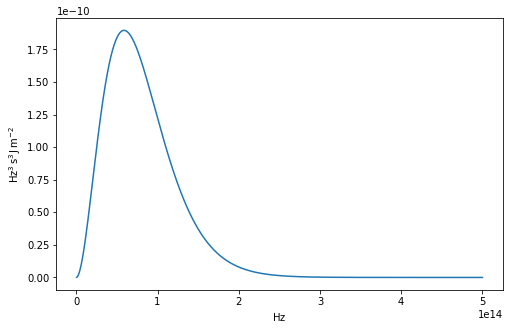

In [31]:
from astropy.visualization import quantity_support

plt.figure(figsize=(8, 5))

temperature = 1000 * u.K
frequencies = np.linspace(1E-5, 0.5e15, 1000) * u.hertz

radiance = blackbody(frequency=frequencies, temperature=temperature)

with quantity_support():   
    plt.plot(frequencies, radiance)

But in other cases there is only the option to convert the quantity to well defined units, strip off the unit and re-attach it after the computation:

In [32]:
emin, emax = [1, 10] * u.TeV
energies = np.logspace(np.log10(emin.value), np.log10(emax.value), 10) * emin.unit
print(energies)

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] TeV


### 1.5 Performance Tips (optional)

As the main data structure of the Quantity is a standard numpy array, they are suitable for computations with large arrays. Still you have to take care of a few pitfalls.

When creating a Quantity with `data * u.km` or `data * u.Unit()` by default a copy of the data is made:

In [33]:
values = np.ones((500, 500, 500))

In [34]:
%%timeit
quantity = values * u.kpc

505 ms ± 7.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


If you would like to avoid the copy you can use:

In [35]:
%%timeit
quantity = u.Quantity(values, unit="kpc", copy=False)

6.57 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In Astropy > 3.1 a new operator was introduced to achieve the same behaviour:

In [36]:
%%timeit
quantity = values << u.Unit("kpc")

10 µs ± 491 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


To avoid copies when converting to different units and getting the values, you can use: 

In [37]:
quantity = u.Quantity(values, unit="kpc", copy=False)
values = quantity.to_value("m")

Instead of using`quantity.to("m").value`.  More details can be found on http://docs.astropy.org/en/stable/units/index.html#performance-tips.

### 1.6 Exercises

- (*easy*) How long does the light travel from the sun to the earth in minutes? How long does the light travel from the Galactic center (assume a distance of 8 kpc) in years? 
- (*advanced*) Define a new unit called `"baro-meter"`, which is eqivalent to 25 cm and use it to measure the height of the empire state building (assume a height of 381 meters). Please read the [Astropy documentation on combining and defining units](http://docs.astropy.org/en/stable/units/combining_and_defining.html) for an example how to do this (For other ways to measure the height of a building using a barometer see [barometer question on Wikipedia](https://en.wikipedia.org/wiki/Barometer_question)...)
- (*expert*) Find the frequency with the maximum photon rate of the black body spectrum $\mathcal{B}(\nu, T)$ with temperature $T=5000~\mathrm{K}$. For this you can use a numerical optimization routine such as [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).
As the frequency as well as the radiance can cover many orders of magnitude, the stability of the algorithm can be much improved by minimizing the (negative) logarithm of the radiance $-\log{\mathcal{B}}$ as well as minimizing with respect to the logarithm of the frequency by introducing the variable $x = \log{\nu}$. Finally compare the result against the analytical solution from [Wien's displacement law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law). 

In [4]:
from astropy import constants as const

### Solutions

#### EASY

In [38]:
# From the sun
print("Length of light travel from Sun in minutes:",(const.au / const.c).to(u.minute))

Length of light travel from Sun in minutes: 8.316746397269274 min


In [37]:
# From the galactic center
distance = u.Quantity("8 kpc").to(u.meter)
print("Length of light travel from GC in years:", (distance / const.c).to(u.year))

Length of light travel from GC in years: 26092.510217339463 yr


#### ADVANCED  
Define a new unit called "baro-meter", which is eqivalent to 25 cm and use it to measure the height of the empire state building (assume a height of 381 meters). Please read the Astropy documentation on combining and defining units for an example how to do this (For other ways to measure the height of a building using a barometer see barometer question on Wikipedia...)

In [29]:
baro_meter = u.def_unit("baro-meter", 25 * u.centimeter)
height = 381 * u.meter

In [36]:
print("Height of Empire S.B. in barometer:",height.to(baro_meter))

Height of Empire S.B. in barometer: 1524.0 baro-meter


#### EXPERT
- Find the frequency with the maximum photon rate of the black body spectrum $\mathcal{B}(\nu, T)$ with temperature $T=5000~\mathrm{K}$. For this you can use a numerical optimization routine such as [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).
As the frequency as well as the radiance can cover many orders of magnitude, the stability of the algorithm can be much improved by minimizing the (negative) logarithm of the radiance $-\log{\mathcal{B}}$ as well as minimizing with respect to the logarithm of the frequency by introducing the variable $x = \log{\nu}$. Finally compare the result against the analytical solution from [Wien's displacement law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law). 

B je spektralna gustoća zračenja frekvencije \nu po jedinici frekvencije

In [43]:
from scipy.optimize import minimize

In [196]:
# @u.quantity_input(frequency=u.hertz, temperature=u.K)
def blackbody(frequency, temperature):
#     x = np.log10(frequency)
    x = frequency
    pre_factor = 2 * (const.h.value * x[0] ** 3) / const.c.value ** 2
#     print(pre_factor)
#     print(const.h * frequency[0].value, const.k_B * temperature)
    exponential_factor = 1. / (np.exp((const.h.value * x[0]) / (const.k_B.value * temperature.value)) - 1)
    rez = pre_factor * exponential_factor
    return -1*np.log10(rez)

In [201]:
x0 = 1e14 * u.Hz
temperature = 5000 * u.K
result = minimize(blackbody,x0, args = temperature, method='Nelder-Mead', bounds=(1e13,1e15))
# print(result.x)
print(result)

 final_simplex: (array([[2.93946286e+14],
       [2.93946286e+14]]), array([7.62523646, 7.62523646]))
           fun: 7.625236458701543
       message: 'Optimization terminated successfully.'
          nfev: 136
           nit: 57
        status: 0
       success: True
             x: array([2.93946286e+14])


In [205]:
temp = 5000 * u.Kelvin
lambda_w = const.b_wien / temp
print(lambda_w)
lambda_w.to("Hz", equivalencies=u.spectral())

5.795543910370346e-07 m


<Quantity 5.17280971e+14 Hz>

## 2. Coordinates

With the submodule [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) Astropy provides a framework to handle sky positions in various coordinate systems and transformations between them.


### 2.1 Basics
The basic class to handle sky coordinates is [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html):

In [8]:
from astropy.coordinates import SkyCoord

It can be created by passing a position angle for longitude and latitude and a keyword specifying a coordinate frame:

In [39]:
position_crab = SkyCoord(83.63 * u.deg,  22.01 * u.deg, frame='icrs')
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63, 22.01)>


As for `Quantities` the instanciation with `lists`, `arrays` or even `Quantities` also works:

In [40]:
positions = SkyCoord([345., 234.3] * u.deg,  [-0.1, 0.2] * u.deg, frame='galactic')

Alternatively the angles can be specified as string:

In [41]:
position_crab = SkyCoord('5h34m31.97s', '22d0m52.10s', frame='icrs')

# or

position_crab = SkyCoord('5:34:31.97', '22:0:52.10',
                         unit=(u.hour, u.deg), frame='icrs')

Where in the first case the unit doesn't have to specified because it is encoded in the string via `'hms'` and `'dms'`.

To transform the coordinates to a different coordinate system we can use `SkyCoord.transform_to()`:

In [48]:
pos_gal = position_crab.transform_to('galactic')

For convenience we can also directly use the `.galactic` or `.icrs` attributes:

In [49]:
position_crab.galactic

<SkyCoord (Galactic): (l, b) in deg
    (184.55745788, -5.78435671)>

In [50]:
position_crab.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63308333, 22.0145)>

A very convenient way to get the coordinates of an individual object is qerying the [Sesame](http://cds.u-strasbg.fr/cgi-bin/Sesame) database with `SkyCoord.from_name()`:

In [51]:
position_crab = SkyCoord.from_name('Crab')
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63308333, 22.0145)>


To access the `longitude` and `latitude` angles individually: 

In [52]:
position_crab.data.lon

<Longitude 83.63308333 deg>

In [53]:
position_crab.data.lat

<Latitude 22.0145 deg>

### 2.2 Measuring distances between positions in the sky
The angular distance between two [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) objects, can be found using the [SkyCoord.separation()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.separation) method:

In [54]:
#position_saga = SkyCoord.from_name('Sag A*')
position_saga = SkyCoord(0 * u.deg, 0 * u.deg, frame='galactic')

position_crab.separation(position_saga)

<Angle 172.64074989 deg>

In [55]:
position_crab

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63308333, 22.0145)>

### 2.3 ALT - AZ coordinates (optional)

In various cirumstances, e.g. for planning observations, it can be usefull to transform a sky coordinate into a position in the horizontal coordinate system given a location on earth and a time

In [56]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time

We define a location using [EarthLocation](http://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html):

In [57]:
paris = EarthLocation(lat=48.8567 * u.deg, lon=2.3508 * u.deg)
print(paris.geodetic)

GeodeticLocation(lon=<Longitude 2.3508 deg>, lat=<Latitude 48.8567 deg>, height=<Quantity 7.2605446e-10 m>)


And a time using the [Time](http://docs.astropy.org/en/stable/api/astropy.time.Time.html) object:

In [58]:
now = Time.now()
print(now)

2021-02-14 08:43:26.498638


Now we can define a horizontal coordinate system using the [AltAz]([docs.astropy.org/en/stable/api/astropy.coordinates.AltAz.html) class and use it to convert from the sky coordinate:

In [59]:
altaz = AltAz(obstime=now, location=paris)
crab_altaz = position_crab.transform_to(altaz)
print(crab_altaz)

<SkyCoord (AltAz: obstime=2021-02-14 08:43:26.498638, location=(4200910.64325784, 172456.78503911, 4780088.65877593) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (13.49900951, -18.04321286)>


### 2.4 Exercises

- (*easy*) Define the sky coordinate for your favorite astronomical object and find the angular distance to the Crab Nebula as well as the Galactic center.
- (*expert*) Make a plot of the height above horizon vs.time for the crab position at the location of Annecy. Mark the time range where it is visible. Would the Crab Nebula be visible tonight?

### Solutions

#### EASY

In [29]:
mrk421 = SkyCoord.from_name("mrk 421", frame="icrs")
crab = SkyCoord.from_name("Crab", frame="icrs")
gc = SkyCoord.from_name("Sgr A*")

In [30]:
mrk421.separation(crab)

<Angle 70.90242718 deg>

In [31]:
mrk421.separation(gc)

<Angle 115.01462814 deg>

#### EXPERT  


In [5]:
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astropy.coordinates import AltAz

In [18]:
ORM = EarthLocation.of_site('Roque de los Muchachos')
ORM

<EarthLocation (5327448.9957829, -1718665.73869569, 3051566.90295403) m>

In [6]:
import pandas as pd
time = pd.date_range('2021-02-17 09:00:0', '2021-02-17 23:00:0', periods=60)

In [11]:
annecy = EarthLocation(lat=6.1600 * u.deg, lon=45.8992 * u.deg, height = 1153)
# print(annecy.geodetic)
aa = AltAz(location = annecy, obstime=time)

In [12]:
crab = SkyCoord.from_name("Crab", frame="icrs")
crab_aa = crab.transform_to(aa)

No handles with labels found to put in legend.


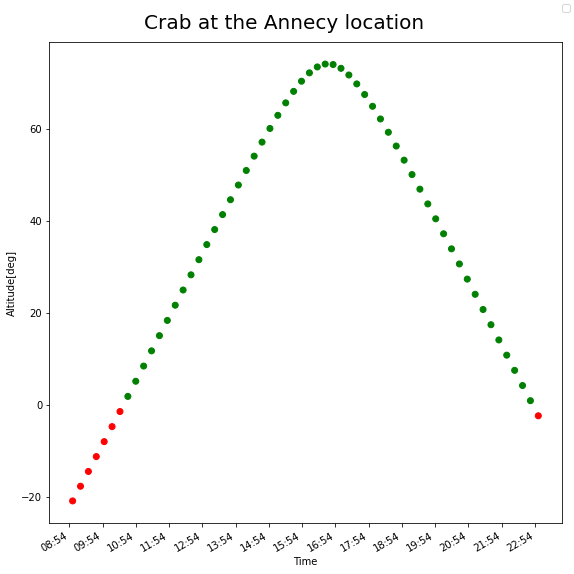

In [19]:
%matplotlib inline
from matplotlib.dates import HourLocator, MinuteLocator, SecondLocator, DateFormatter
cmap_setting = 'viridis' #viridis, magma, plasma, inferno
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
# ax = ax.ravel()
fig.suptitle("Crab at the Annecy location", fontsize=20)
color = ['green' if x>=0 else 'red' for x in crab_aa.alt.value]
tmp1 = ax.scatter(time, crab_aa.alt.value, color=color, cmap=cmap_setting)
ax.set_xlabel("Time")
ax.set_ylabel("Altitude[deg]")
ax.xaxis.set_major_locator(MinuteLocator(interval=60))
ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
# fig.patch.set_alpha(1.0)
fig.legend()
# fig.tight_layout()
fig.autofmt_xdate()
# cbar = fig.colorbar(tmp1, ax=ax, orientation='horizontal', label="Altitude [deg]", cmap=cmap_setting)
# fig.savefig("Saved_pictures/dCoord_LST_drive_SG_astr.png")
fig.tight_layout()

## 3. Tables

Astropy provides the [Table](http://docs.astropy.org/en/stable/api/astropy.io.votable.tree.Table.html) class in order to handle data tables.

### 3.1 Basics

Table objects can be created as shown in the following

In [73]:
from astropy.table import Table

In [74]:
table = Table()

We add columns to the table like we would add entries to a dictionary

In [22]:
table['Source_Name'] = ['Crab', 'Sag A*', 'Cas A']
table['GLON'] = [184.55754381, 0, 111.74169477] * u.deg
table['GLAT'] = [-5.78427369, 0, -2.13544151] * u.deg

By executing the following cell, we get a nicely formatted version of the table printed in the notebook:

In [23]:
table

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0
Cas A,111.74169477,-2.13544151


### 3.2 Accessing rows and columns

We have access to the defined columns. To check which ones are availbe you can use `Table.colnames`:

In [24]:
table.colnames

['Source_Name', 'GLON', 'GLAT']

And access individual columns just by their name:

In [25]:
table['GLON']

184.55754381
0.0
111.74169477


And also a subset of columns:

In [26]:
table[['Source_Name', 'GLON']]

Source_Name,GLON
,deg
str6,float64
Crab,184.55754381
Sag A*,0.0
Cas A,111.74169477


Often, it is handy to get the column data as [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity) using the `.quantity` property:

In [27]:
table['GLON'].quantity

<Quantity [184.55754381,   0.        , 111.74169477] deg>

Rows can be accessed using numpy indexing:

In [28]:
table[0:2]

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0


Or by using a boolean numpy array for indexing:

In [29]:
selection = table['Source_Name'] == 'Crab'
table[selection]

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369


There is also a more sophisticated indexing scheme, which is explained [here](http://docs.astropy.org/en/stable/table/indexing.html), but not covered in this tutorial.

### 3.3 Reading / Writing tables to disk
Astropy tables can be serialized into many formats. For an overview see [here](http://docs.astropy.org/en/latest/io/unified.html#built-in-table-readers-writers). To write the table in FITS format we can use:

In [70]:
table.write('data/example.fits', overwrite=True, format='fits')

In [71]:
table.write('data/example.ecsv', overwrite=True, format='ascii.ecsv')

In [77]:
table = Table.read('data/example.fits')
table

Source_Name,GLON,GLAT
,deg,deg
bytes6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0
Cas A,111.74169477,-2.13544151


### 3.4. Miscellaneous

These are a few other useful operations when working with Astropy tables.

Sort by key:

In [71]:
table.sort('GLON')

In [72]:
table

Source_Name,GLON,GLAT
,deg,deg
bytes6,float64,float64
Sag A*,0.0,0.0
Cas A,111.74169477,-2.13544151
Crab,184.55754381,-5.78427369


Note that `.sort()` is an in place operation on the table, i.e. changes the actual table.

To remove a specific row by index:

In [34]:
table.remove_row(0)

Astropy tables also support row-wise iteration in Python loops:

In [35]:
for row in table:
    print(row['Source_Name'])

Cas A
Crab


Another useful feature for quickly inspecting the data contained in the table is the `.show_in_browser()` method:

In [36]:
table.show_in_browser(jsviewer=True)

### 3.5 Exercises

- (*easy*) Add columns with the `RA` and `DEC` coordinates of the objects to the example table.
- (*advanced *) Load the Fermi 2FHL catalog table (`'data/fermi_2fhl_catalog.fits'`) and find the brighest source (the brightness value is stored in the `'Flux50'` column). What is the common name of the source (column `'ASSOC'`)?
Find all sources within 10 deg from the position of this source.
- (*expert*) Make an allsky plot (using an 'Aitoff' projection) of all the sources in the Fermi 2FHL catalog grouped by source class (i.e. choose a different marker color for every source class). The class of the sources is stored in the `'CLASS'` column. There are a few possible ways to identify the groups of source class. One of them is to use [Table.group_by()](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.group_by) followed by a loop over the groups (check Astropy documentation!) another way is to use a regular Python `set` to idenfity the unique entries in the `'CLASS'` column and loop over those. You can use `plt.subplot(projection='aitoff')` to instanciate a matplotlib axes with `'Aitoff'` projection. Note that the `'Aitoff'` projection requires angular positions measured in radians.

### Solutions

#### EASY

In [78]:
table["RA"] = [SkyCoord(x["GLON"], x["GLAT"], frame='galactic', unit='deg').transform_to('icrs').ra.value for x in table]
table["DEC"] = [SkyCoord(x["GLON"], x["GLAT"], frame="galactic", unit='deg').transform_to('icrs').dec.value for x in table]

In [79]:
table

Source_Name,GLON,GLAT,RA,DEC
,deg,deg,,
bytes6,float64,float64,float64,float64
Crab,184.55754381,-5.78427369,83.63320833052822,22.014472226225813
Sag A*,0.0,0.0,266.4049882865447,-28.936177761791473
Cas A,111.74169477,-2.13544151,350.8664167089621,58.81177779991024


In [80]:
#provjera
s = SkyCoord.from_name("crab")
s

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63308333, 22.0145)>

#### ADVANCED  
Load the Fermi 2FHL catalog table (`'data/fermi_2fhl_catalog.fits'`) and find the brighest source (the brightness value is stored in the `'Flux50'` column). What is the common name of the source (column `'ASSOC'`)?
Find all sources within 10 deg from the position of this source.

In [170]:
fermi_catalog = Table.read('data/fermi_2fhl_catalog.fits')
fermi_catalog

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV [2],Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV [2],Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV [2],Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
,deg,deg,deg,deg,deg,deg,,,,,,,,ph / (cm2 s),ph / (cm2 s),erg / (cm2 s),erg / (cm2 s),ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,,GeV,,,,,,,,Hz,,,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes25,float32,float32,bytes8,float32,float32,bytes18,bytes18,bytes18
2FHL J0008.1+4709,2.044,47.164,115.339,-15.069,0.061,0.098,28.6,6.24,2.75,3.96,3.19,2.16,4.21,1.2300e-11,6.7100e-12,1.2100e-12,6.7100e-13,3.3634e-12,-1.5367e-12 .. 2.1609e-12,5.35,4.3495e-18,nan .. 4.7539e-12,0.00,8.4487e-18,nan .. 7.2910e-12,0.00,4.00,68.15,0.99,1,MG4 J000800+4712,0.9972,0.8348,bll,2.10000,2.5119e+15,3FGL J0008.0+4713,1FHL J0007.7+4709,
2FHL J0009.3+5031,2.343,50.522,116.124,-11.793,0.045,0.073,54.0,5.08,1.66,nan,nan,nan,nan,1.9100e-11,7.8200e-12,2.0300e-12,8.7900e-13,8.3628e-12,-2.9896e-12 .. 3.8951e-12,7.35,2.9146e-17,nan .. 5.1000e-12,0.00,3.5087e-16,nan .. 4.8746e-12,0.00,6.40,72.76,1.00,1,NVSS J000922+503028,0.9997,0.7348,bll,0.00000,1.4125e+15,3FGL J0009.3+5030,1FHL J0009.2+5032,
2FHL J0018.5+2947,4.635,29.788,114.463,-32.542,0.037,0.060,30.9,2.58,0.99,2.41,1.04,2.40,1.04,1.0600e-11,6.1500e-12,2.0500e-12,1.7200e-12,9.6544e-12,-5.5534e-12 .. 5.5534e-12,5.77,1.1790e-15,nan .. 5.3787e-12,0.00,1.6047e-16,nan .. 6.1201e-12,0.00,3.00,127.32,1.00,3,RBS 0042,0.9999,0.9785,bll,0.10000,5.9156e+16,3FGL J0018.4+2947,1FHL J0018.6+2946,
2FHL J0022.0+0006,5.500,0.106,107.172,-61.862,0.051,0.082,30.0,1.86,0.57,0.95,0.72,0.88,0.71,1.9700e-11,9.5600e-12,6.8600e-12,5.2900e-12,1.6120e-11,-7.1726e-12 .. 9.9535e-12,5.38,3.6392e-12,-4.3864e-12 .. 4.3864e-12,1.39,8.4236e-16,nan .. 7.3424e-12,0.00,4.80,180.13,0.86,2,5BZGJ0022+0006,0.9993,0.9001,bll-g,0.30600,4.3152e+16,,,
2FHL J0033.6-1921,8.411,-19.358,94.280,-81.222,0.035,0.056,148.3,3.32,0.69,2.56,0.88,2.33,0.92,5.4600e-11,1.5000e-11,7.6200e-12,2.6900e-12,4.0016e-11,-1.0162e-11 .. 1.2238e-11,12.17,2.1390e-12,nan .. 8.2581e-12,0.91,2.4395e-17,nan .. 6.8423e-12,0.00,13.80,170.01,0.99,2,KUV 00311-1938,0.9998,0.9814,bll,0.61000,8.3176e+15,3FGL J0033.6-1921,1FHL J0033.6-1921,TeV J0033-193
2FHL J0035.8+5949,8.962,59.831,120.972,-2.981,0.032,0.051,402.4,2.23,0.21,nan,nan,nan,nan,1.2500e-10,1.9000e-11,3.1100e-11,7.2300e-12,9.4229e-11,-1.5257e-11 .. 1.7157e-11,17.31,2.6699e-11,-7.6282e-12 .. 9.4508e-12,10.39,3.7261e-16,nan .. 4.6744e-12,0.00,46.50,247.62,0.96,4,1ES 0033+595,1.0000,0.9929,bll,0.00000,1.3183e+17,3FGL J0035.9+5949,1FHL J0035.9+5950,TeV J0035+598
2FHL J0040.3+4049,10.095,40.832,120.676,-21.992,0.036,0.057,26.8,2.12,0.81,nan,nan,nan,nan,1.0500e-11,6.3000e-12,2.8400e-12,2.6700e-12,7.4158e-12,-4.0778e-12 .. 6.4518e-12,4.95,3.0031e-12,-2.3178e-12 .. 4.4664e-12,1.71,4.7317e-16,nan .. 5.7981e-12,0.00,3.20,258.77,0.85,3,B3 0037+405,0.9987,0.9347,bcu I,0.00000,1.0000e+00,3FGL J0040.3+4049,1FHL J0040.3+4049,
2FHL J0043.9+3424,10.976,34.411,121.164,-28.435,0.059,0.095,39.5,4.57,1.61,3.46,1.85,2.95,1.91,1.8300e-11,8.2400e-12,2.0300e-12,9.9300e-13,9.6576e-12,-4.3169e-12 .. 4.3169e-12,6.31,8.7586e-17,nan .. 5.2433e-12,0.00,9.4381e-16,nan .. 5.6879e-12,0.00,5.40,109.97,0.90,3,GB6 J0043+3426,0.9986,0.8388,fsrq,0.96600,6.4565e+13,3FGL J0043.8+3425,1FHL J0043.7+3425,


In [174]:
fermi_catalog.add_index(["Source_Name", "ASSOC"])

In [172]:
fermi_catalog.info()

<Table length=360>
            name             dtype  shape      unit      format  n_bad
--------------------------- ------- ----- ------------- -------- -----
                Source_Name bytes18                                  0
                    RAJ2000 float32                 deg {:10.3f}     0
                    DEJ2000 float32                 deg {:10.3f}     0
                       GLON float32                 deg {:10.3f}     0
                       GLAT float32                 deg {:10.3f}     0
                 Pos_err_68 float32                 deg {:10.3f}     0
                 Pos_err_95 float32                 deg {:10.3f}     0
                         TS float32                      {:8.1f}     0
             Spectral_Index float32                      {:6.2f}     0
         Unc_Spectral_Index float32                      {:6.2f}     1
    Intr_Spectral_Index_D11 float32                      {:6.2f}   232
Unc_Intr_Spectral_Index_D11 float32                      {

In [176]:
fermi_catalog[fermi_catalog["Flux50"] == fermi_catalog["Flux50"].max()]

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV [2],Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV [2],Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV [2],Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
,deg,deg,deg,deg,deg,deg,,,,,,,,ph / (cm2 s),ph / (cm2 s),erg / (cm2 s),erg / (cm2 s),ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,,GeV,,,,,,,,Hz,,,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes25,float32,float32,bytes8,float32,float32,bytes18,bytes18,bytes18
2FHL J0534.5+2201,83.634,22.021,184.552,-5.780,0.030,0.049,5149.7,2.13,0.07,nan,nan,nan,nan,1.3100e-09,6.8300e-11,3.5200e-10,2.9000e-11,9.9407e-10,-5.7595e-11 .. 5.9473e-11,63.58,2.4388e-10,-2.8254e-11 .. 3.0435e-11,33.18,5.2754e-11,-1.3340e-11 .. 1.6048e-11,14.46,377.70,1463.30,1.00,19,Crab,0.9983,0.9969,pwn,nan,nan,3FGL J0534.5+2201i,1FHL J0534.5+2201,TeV J0534+220p


In [177]:
source_name_max = fermi_catalog[fermi_catalog["Flux50"] == fermi_catalog["Flux50"].max()]["Source_Name"]
source_name_max[0]

'2FHL J0534.5+2201'

In [178]:
assoc_name_max = fermi_catalog[fermi_catalog["Flux50"] == fermi_catalog["Flux50"].max()]["ASSOC"]
assoc_name_max[0]

'Crab'

In [179]:
fermi_catalog[fermi_catalog["Source_Name"] == source_name_max[0]]

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV [2],Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV [2],Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV [2],Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
,deg,deg,deg,deg,deg,deg,,,,,,,,ph / (cm2 s),ph / (cm2 s),erg / (cm2 s),erg / (cm2 s),ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,,GeV,,,,,,,,Hz,,,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes25,float32,float32,bytes8,float32,float32,bytes18,bytes18,bytes18
2FHL J0534.5+2201,83.634,22.021,184.552,-5.780,0.030,0.049,5149.7,2.13,0.07,nan,nan,nan,nan,1.3100e-09,6.8300e-11,3.5200e-10,2.9000e-11,9.9407e-10,-5.7595e-11 .. 5.9473e-11,63.58,2.4388e-10,-2.8254e-11 .. 3.0435e-11,33.18,5.2754e-11,-1.3340e-11 .. 1.6048e-11,14.46,377.70,1463.30,1.00,19,Crab,0.9983,0.9969,pwn,nan,nan,3FGL J0534.5+2201i,1FHL J0534.5+2201,TeV J0534+220p


In [285]:
temp = [x for x in fermi_catalog if SkyCoord(x["RAJ2000"], x["DEJ2000"], frame = 'icrs', unit='deg').separation(SkyCoord(crab_ra, crab_dec,frame='icrs', unit="deg")) < 10*u.deg]

In [286]:
temp

[<Row index=80>
    Source_Name     RAJ2000    DEJ2000      GLON       GLAT    Pos_err_68 Pos_err_95    TS    Spectral_Index Unc_Spectral_Index Intr_Spectral_Index_D11 Unc_Intr_Spectral_Index_D11 Intr_Spectral_Index_G12 Unc_Intr_Spectral_Index_G12    Flux50     Unc_Flux50  Energy_Flux50 Unc_Energy_Flux50 Flux50_171GeV   Unc_Flux50_171GeV [2]   Sqrt_TS50_171GeV Flux171_585GeV  Unc_Flux171_585GeV [2]  Sqrt_TS171_585GeV Flux585_2000GeV Unc_Flux585_2000GeV [2]  Sqrt_TS585_2000GeV  Npred   HEP_Energy HEP_Prob   ROI           ASSOC        ASSOC_PROB_BAY ASSOC_PROB_LR CLASS  Redshift NuPeak_obs     3FGL_Name         1FHL_Name     TeVCat_Name
                      deg        deg        deg        deg        deg        deg                                                                                                                                                        ph / (cm2 s) ph / (cm2 s) erg / (cm2 s)   erg / (cm2 s)    ph / (cm2 s)        ph / (cm2 s)                         ph / (cm2

#### Pandas  
#### ADVANCED  
Load the Fermi 2FHL catalog table (`'data/fermi_2fhl_catalog.fits'`) and find the brighest source (the brightness value is stored in the `'Flux50'` column). What is the common name of the source (column `'ASSOC'`)?
Find all sources within 10 deg from the position of this source.

In [233]:
names = [name for name in fermi_catalog.colnames if len(fermi_catalog[name].shape) <= 1]
df = fermi_catalog[names].to_pandas()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source_Name                  360 non-null    object 
 1   RAJ2000                      360 non-null    float32
 2   DEJ2000                      360 non-null    float32
 3   GLON                         360 non-null    float32
 4   GLAT                         360 non-null    float32
 5   Pos_err_68                   360 non-null    float32
 6   Pos_err_95                   360 non-null    float32
 7   TS                           360 non-null    float32
 8   Spectral_Index               360 non-null    float32
 9   Unc_Spectral_Index           359 non-null    float32
 10  Intr_Spectral_Index_D11      128 non-null    float32
 11  Unc_Intr_Spectral_Index_D11  127 non-null    float32
 12  Intr_Spectral_Index_G12      128 non-null    float32
 13  Unc_Intr_Spectral_In

In [234]:
df.head()

,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,...,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
0,b'2FHL J0008.1+4709',2.0437,47.164200,115.339355,-15.068757,0.061114,0.098394,28.639999,6.24,2.75,...,1,b'MG4 J000800+4712',0.997220,0.834827,b'bll',2.100,2.511884e+15,b'3FGL J0008.0+4713',b'1FHL J0007.7+4709',b''
1,b'2FHL J0009.3+5031',2.3435,50.521702,116.124107,-11.793202,0.045439,0.073157,53.970001,5.08,1.66,...,1,b'NVSS J000922+503028',0.999724,0.734808,b'bll',0.000,1.412536e+15,b'3FGL J0009.3+5030',b'1FHL J0009.2+5032',b''
2,b'2FHL J0018.5+2947',4.6355,29.787901,114.463493,-32.542351,0.037094,0.059721,30.889999,2.58,0.99,...,3,b'RBS 0042',0.999868,0.978522,b'bll',0.100,5.915607e+16,b'3FGL J0018.4+2947',b'1FHL J0018.6+2946',b''
3,b'2FHL J0022.0+0006',5.5001,0.105900,107.171715,-61.861752,0.051185,0.082408,29.959999,1.86,0.57,...,2,b'5BZGJ0022+0006',0.999280,0.900089,b'bll-g',0.306,4.315193e+16,b'',b'',b''
4,b'2FHL J0033.6-1921',8.4115,-19.357500,94.280022,-81.222366,0.034838,0.056090,148.309998,3.32,0.69,...,2,b'KUV 00311-1938',0.999759,0.981424,b'bll',0.610,8.317639e+15,b'3FGL J0033.6-1921',b'1FHL J0033.6-1921',b'TeV J0033-193'


In [235]:
row = df[df["Flux50"] == df["Flux50"].max()]
row

,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,...,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
85,b'2FHL J0534.5+2201',83.634102,22.0215,184.552017,-5.779817,0.030251,0.048704,5149.740234,2.13,0.07,...,19,b'Crab',0.998329,0.996944,b'pwn',NaN,NaN,b'3FGL J0534.5+2201i',b'1FHL J0534.5+2201',b'TeV J0534+220p'


In [218]:
source_name_max = row["Source_Name"].values[0]
source_name_max

b'2FHL J0534.5+2201'

In [219]:
assoc_name_max = row["ASSOC"].values[0]
assoc_name_max

b'Crab'

In [255]:
df[df["ASSOC"] == b"Crab"]["RAJ2000"].values[0]

83.6341

In [256]:
crab_ra = df[df["ASSOC"] == b"Crab"]["RAJ2000"].values[0]
crab_dec = df[df["ASSOC"] == b"Crab"]["DEJ2000"].values[0]

In [260]:
temp = SkyCoord(ra=crab_ra, dec=crab_dec, unit="deg")
temp

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63410187, 22.02149963)>

In [264]:
# table["RA"] = [SkyCoord(x["GLON"], x["GLAT"], frame='galactic', unit='deg').transform_to('icrs').ra.value for x in table]
    
[if SkyCoord(x["RAJ2000"], x["DEJ2000"], frame = 'icrs', unit='deg').separation(SkyCoord(crab_ra, crab_dec, unit="deg")) < 10*u.deg for x in df ]

SyntaxError: invalid syntax (<ipython-input-264-f34487a3a79f>, line 3)

In [278]:
[x for x in df if SkyCoord(x["RAJ2000"], x["DEJ2000"], frame = 'icrs', unit='deg').separation(SkyCoord(crab_ra, crab_dec,frame='icrs', unit="deg")) < 10*u.deg]

TypeError: byte indices must be integers or slices, not str

In [281]:
df.loc[:,"RAJ2000"]

0        2.043700
1        2.343500
2        4.635500
3        5.500100
4        8.411500
          ...    
355    352.308014
356    355.203003
357    355.898010
358    356.750000
359    358.019012
Name: RAJ2000, Length: 360, dtype: float32

In [283]:
df["nova"] = 1 if SkyCoord(df.loc[:,"RAJ2000"], df.loc[:,"DEJ2000"], unit = "deg").separation(SkyCoord(crab_ra, crab_dec, unit="deg")) > 10*u.deg else 0 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [279]:
[x for x in df["Source_Name"]]

[b'2FHL J0008.1+4709',
 b'2FHL J0009.3+5031',
 b'2FHL J0018.5+2947',
 b'2FHL J0022.0+0006',
 b'2FHL J0033.6-1921',
 b'2FHL J0035.8+5949',
 b'2FHL J0040.3+4049',
 b'2FHL J0043.9+3424',
 b'2FHL J0045.2+2127',
 b'2FHL J0048.0+5449',
 b'2FHL J0051.2-6242',
 b'2FHL J0054.8-2455',
 b'2FHL J0110.1+6806',
 b'2FHL J0114.4+1323',
 b'2FHL J0114.9-3359',
 b'2FHL J0115.8+2519',
 b'2FHL J0120.5-2702',
 b'2FHL J0123.7-2308',
 b'2FHL J0131.0+6120',
 b'2FHL J0136.5+3906',
 b'2FHL J0138.2+5811',
 b'2FHL J0141.3-0927',
 b'2FHL J0143.8-5847',
 b'2FHL J0148.1+5201',
 b'2FHL J0152.8+0146',
 b'2FHL J0153.5+7113',
 b'2FHL J0157.0-5301',
 b'2FHL J0205.4+6450',
 b'2FHL J0209.3-5228',
 b'2FHL J0211.2+1050',
 b'2FHL J0213.9-6949',
 b'2FHL J0214.9+5149',
 b'2FHL J0214.9+7555',
 b'2FHL J0221.1+3556',
 b'2FHL J0222.6+4301',
 b'2FHL J0231.0-5755',
 b'2FHL J0237.6-3605',
 b'2FHL J0238.4-3116',
 b'2FHL J0238.8+1631',
 b'2FHL J0240.5+6113',
 b'2FHL J0241.5+6544',
 b'2FHL J0244.9-5820',
 b'2FHL J0245.6+6605',
 b'2FHL J03